# k-NEAREST NEIGHBORS to classify email as spam

# IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix    # Evaluation measure

# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [4]:
# Imports the training data
trn = pd.read_csv('/Users/sumedhajauhari/Desktop/My Study Material/Ex_Files_Data_Mining_Python_R/Exercise Files/data/spambase_trn.csv')
display(trn.head(10))

# Separates the attributes X0-X56 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('/Users/sumedhajauhari/Desktop/My Study Material/Ex_Files_Data_Mining_Python_R/Exercise Files/data/spambase_tst.csv')

# Separates the attributes X0-X56 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
spam = ['1','0']

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.17,0.00,0.0,0.00,0.00,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.70,0.00,1.06,0.0,0.00,0.00,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.00,0.00,1.58,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0
5,0.32,0.00,1.64,0.0,0.98,0.00,0.32,0.00,0.65,1.31,...,0.000,0.000,0.000,0.858,0.101,0.000,337.250,1146,1349,1
6,0.17,0.17,0.71,0.0,0.53,0.17,0.17,0.89,0.17,0.53,...,0.000,0.115,0.000,1.158,0.057,0.000,5.163,63,599,1
7,0.17,0.26,1.24,0.0,0.53,0.62,0.44,0.17,0.79,0.79,...,0.000,0.070,0.000,0.225,0.211,0.014,6.725,583,1345,1
8,0.00,0.56,0.28,0.0,0.00,0.00,0.56,0.00,0.00,0.56,...,0.000,0.114,0.000,0.153,0.000,0.153,9.250,394,555,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.58,...,0.000,0.817,0.000,0.000,0.000,0.000,1.640,5,146,0


Look at the first few rows of the training data.

In [12]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


In [57]:
trn['y'].unique()

array([1, 0])

# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [45]:
# Sets up a kNN model and fits it to data . Taking neighbors=5 for start
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

## Calculate Mean Accuracy on Training Data

In [46]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 95.24%


## Optimize the kNN Model
The challenge in training a kNN model is to determine the optimal number of neighbors. To find the optimal parameters, `GridSearchCV` object can be used.

In [59]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

#n_neighbors=7 is what GridCV algo is pointing out to be the best for the model

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

## Plot the Accuracy by Neighbors Parameter
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The `grid` variable has an attribute `cv_results_`, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

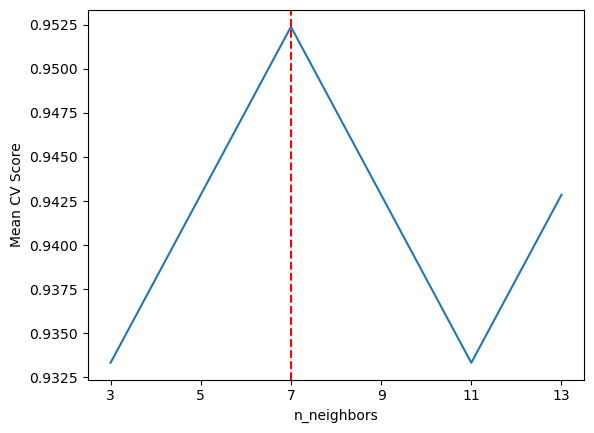

In [60]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

#the red dotted line shows that highest number of neighbors should be 7 cross validation or CV score is the highest there

# TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

In [72]:
"""plot_confusion_matrix(
    best_knn, X_tst, y_tst,
    display_labels=spam,
    normalize='true') """

"plot_confusion_matrix(\n    best_knn, X_tst, y_tst,\n    display_labels=spam,\n    normalize='true') "

Unique labels in y_tst: [0 1]
Unique labels in y_pred: [0 1]


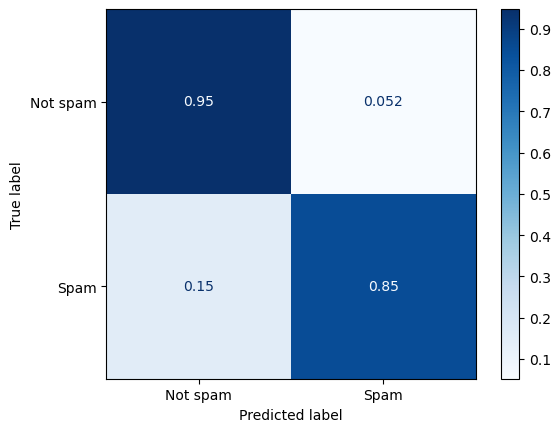

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Preprocess the data
scaler = StandardScaler()
X_trn_scaled = scaler.fit_transform(X_trn)
X_tst_scaled = scaler.transform(X_tst)

# Step 2: Train the KNeighborsClassifier
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_trn_scaled, y_trn)

# Step 3: Predict on the test data
y_pred = best_knn.predict(X_tst_scaled)

# Step 4: Check unique labels in test and prediction
print("Unique labels in y_tst:", np.unique(y_tst))
print("Unique labels in y_pred:", np.unique(y_pred))

# Step 5: Compute and plot confusion matrix
cm = confusion_matrix(y_tst, y_pred, labels=[0, 1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.show()




## Calculate Mean Accuracy on Testing Data

In [75]:
"""print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst)))) """

try:
    accuracy = best_knn.score(X_tst_scaled, y_tst)
    print('Accuracy on testing data: ' + str("{:.2%}".format(accuracy)))
except Exception as e:
    print("An error occurred while calculating accuracy:", e)
    
# you see accuracy has gone down on testing data

Accuracy on testing data: 90.80%
